In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display

In [9]:
# Define colors
GRAY = ['#231F20', '#393536', '#4f4c4d', '#656263', '#7b7979', '#918f90', '#a7a5a6', '#bdbcbc', '#d3d2d2', '#e9e9e9']
BLUE = ['#174b7e','#2e5d8b', '#456f98', '#5d81a5', '#7493b2', '#8ba5bf', '#a2b7cb', '#b9c9d8', '#d1dbe5', '#e8edf2']
RED = ['#C3514E', '#E6BAB7']
GREEN = ['#0C8040', '#9ABB59']
ORANGE = ['#F79747']

# Configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'

def style_plot(ax, title, xlabel, ylabel):
    ax.set_title(title, color=GRAY[5], pad=15)

    ax.set_xlabel(xlabel, loc='left', color=GRAY[5])
    ax.set_ylabel(ylabel, loc='top', color=GRAY[5])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color(GRAY[5])
    ax.spines['left'].set_color(GRAY[5])

    ax.tick_params(axis='x', colors=GRAY[5], which='both')
    ax.tick_params(axis='y', colors=GRAY[5], which='both')

# Process the data

In [10]:
# Get the co2 emissions of all countries in 2021
# Dataset: https://zenodo.org/record/7215364 
co2_emissions = pd.read_csv("../datasets/co2_emissions_2022/GCB2022v27_MtCO2_flat.csv")
co2_emissions = co2_emissions[co2_emissions['Country'] != 'Global']
display(co2_emissions)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
62827,International Transport,XIT,2017,1230.506945,NaN,1230.506945,NaN,NaN,NaN,NaN,NaN
62828,International Transport,XIT,2018,1270.690768,NaN,1270.690768,NaN,NaN,NaN,NaN,NaN
62829,International Transport,XIT,2019,1249.558280,NaN,1249.558280,NaN,NaN,NaN,NaN,NaN
62830,International Transport,XIT,2020,938.508679,NaN,938.508679,NaN,NaN,NaN,NaN,NaN


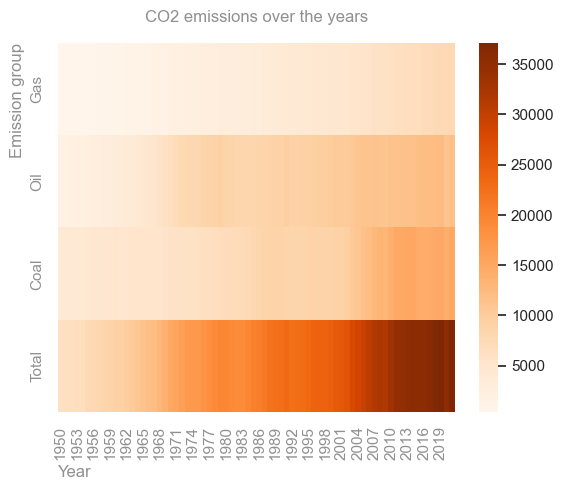

In [126]:
data = co2_emissions.pivot(index='Year', columns='Country')[['Gas', 'Oil', 'Coal', 'Total']]
data = pd.concat([data['Gas'].sum(axis=1), data['Oil'].sum(axis=1), data['Coal'].sum(axis=1), data['Total'].sum(axis=1)], axis=1)
data = data.set_axis(['Gas', 'Oil', 'Coal', 'Total'], axis=1)

ax = sns.heatmap(data[data.index >= 1950].transpose(), cmap='Oranges')
style_plot(ax, "CO2 emissions over the years", "Year", "Emission group")